# Import

In [1]:
%matplotlib inline
import os,sys
import matplotlib
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import sfdmap
import extinction
from astropy import units as u
import math
import pylatex

# pyqsofit
from scipy import interpolate

# for SDSS SQL queries
import mechanize
from io import BytesIO

import glob,timeit

#sys.path.append('/Users/runnojc1/Software/py/pyspeckit')
import pyspeckit
from pyspeckit.spectrum.models.inherited_gaussfitter import gaussian
from pyspeckit.specwarnings import PyspeckitWarning
from astropy.table import Table

# Data

In [3]:
# Printing header

file_path = 'HETspec/PSU22-2-010/spectrum_20220325_0000009_exp01_orange.fits'

with fits.open(file_path) as hdul:
    header = hdul[0].header

print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2064                                                  NAXIS2  =                    6                                                  EXTEND  =                    T                                                  DATE    = '2022-03-25T07:58:25.151608'                                          DATE-OBS= '2022-03-25'                                                          TELESCOP= 'het     '                                                            INSTRUME= 'lrs2    '                                                            OBJECT  = 'BBH019_066_W'                                                        OBSERVER= ''                                                                    TELRA   = '+09:51:49.1'                 

In [14]:
file_path = 'HETspec/PSU22-2-010/spectrum_20220325_0000008_exp01_orange.fits'

# redshift
z = 0.2144

with fits.open(file_path) as hdul:
    data = hdul[0].data

wl = data[0]/(1+z)
flux = data[1]*1e17
e_flux = data[2]*1e17



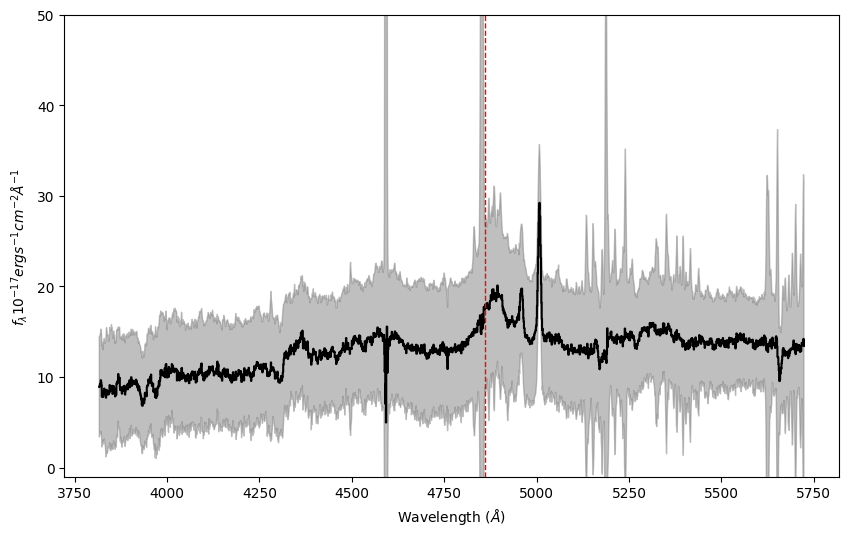

In [17]:
bin_width = 1

bins = np.arange(min(wl), max(wl) + bin_width, bin_width)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

indices = np.digitize(wl, bins)

binned_wl = []
binned_flux = []
binned_flux_err = []


for i in range(1, len(bins)):
    in_bin = indices == i
    if np.any(in_bin):
        binned_wl.append(np.mean(wl[in_bin]))
        binned_flux.append(np.mean(flux[in_bin]))
        binned_flux_err.append(np.mean(e_flux[in_bin]))
    else:
        pass

binned_wl = np.array(binned_wl)
binned_flux = np.array(binned_flux)
binned_flux_err = np.array(binned_flux_err)

rest_wavelength = 1546*(1+z)

c = 299792.458

velocity = c * (binned_wl - rest_wavelength) / rest_wavelength

plt.figure(figsize=(10, 6))
plt.plot(binned_wl, binned_flux, label='Binned Spectrum', color="black", drawstyle='steps-mid')
plt.fill_between(binned_wl, binned_flux - binned_flux_err, binned_flux + binned_flux_err, color='gray', alpha=0.5, label='Error')
plt.axvline(x=4861.333, color='r', linestyle='--', linewidth=1, label="H beta")
#plt.axvline(x=6583.460, color='r', linestyle='--', linewidth=1, label="NII")
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("$f_{\lambda} 10^{-17} erg s^{-1} cm^{-2} \AA^{-1}$")
#plt.xlim(4750, 5250)
plt.ylim(-1, 50)
#plt.legend()
plt.show()